#Question 1#

##part A##

VGG16:

VGG16 is a popular CNN used for object detection and classification with high amount of accuracy. The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.

VGG16 takes input tensor size as 224, 244 with 3 RGB channel. Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2.

the architechture fo VGG16:

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1100/format:webp/0*0M8CobXpNwFDCmOQ', width=1000,height=500)

image source: https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

In [2]:
Image(url='https://miro.medium.com/v2/resize:fit:1100/format:webp/0*6VP81rFoLWp10FcG', width=500,height=250)

image source: https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

Resnet50:
ResNet50 is a type of CNN used for tasks like image recognition.

It's deeper than previous network VGG16, having 50 layers.

ResNet50 is effective for tasks like image classification and object detection, it also solves the problem of vanishing gradient so it can be deeper than regular CNNs.

It introduces "skip connections" to help with training deeper networks, where the input of each block is being added to the result of that block.

in Resnet we have two types of skip connections:

Identity Block:
It's used when the input and output dimensions are the same.
It consists of a series of convolutional layers followed by batch normalization and ReLU activation functions.

Projection Block:
is used when the input and output dimensions are different.
It involves a convolutional layer with a stride greater than 1 to change the dimensions, followed by batch normalization and ReLU activation functions.
This block is used to adjust the dimensions of the input to match the desired output dimensions.

In [3]:
!gdown 1vXxQyGpGxxl-LohCqndNR4jpGBOVWwGe

Downloading...
From: https://drive.google.com/uc?id=1vXxQyGpGxxl-LohCqndNR4jpGBOVWwGe
To: /content/Slide38.JPG
100% 162k/162k [00:00<00:00, 24.7MB/s]


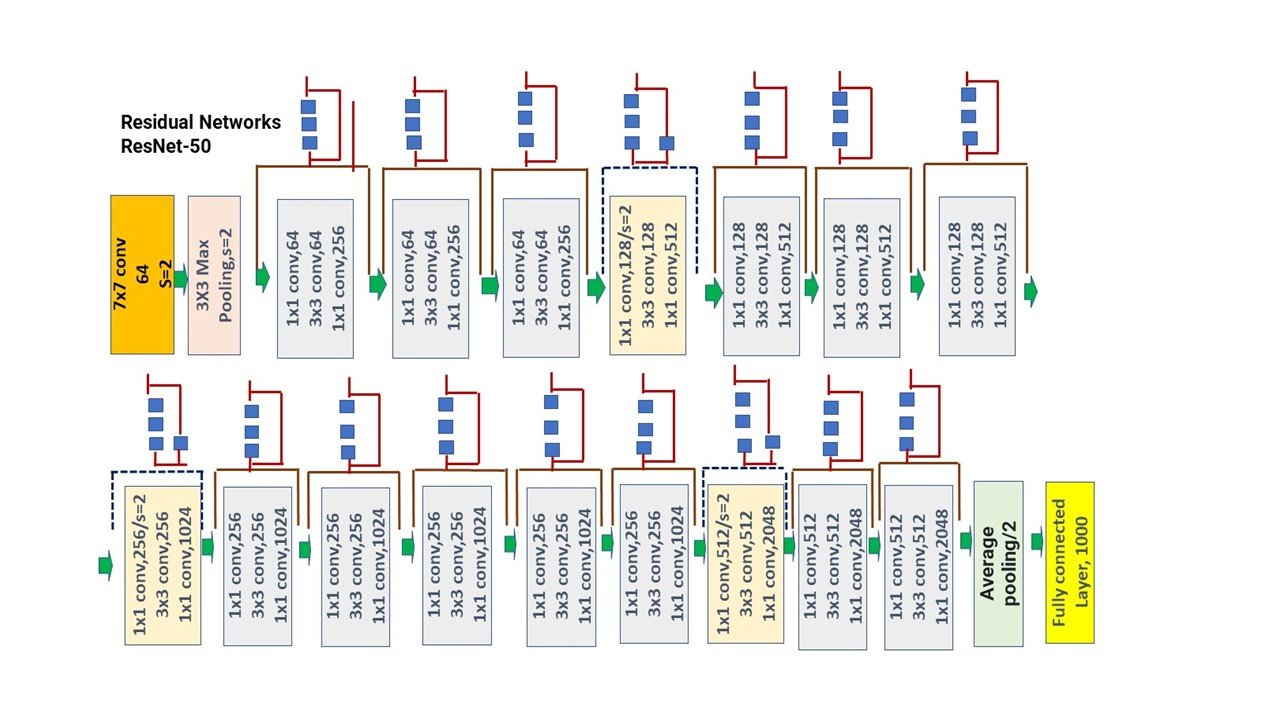

In [4]:
Image(filename='/content/Slide38.JPG', width=1000,height=500)

image source: https://drive.google.com/file/d/15TFDjKen3Z-L_ooPu4LZusIRImWSK0ET/view?usp=sharing

##part B##

fisrt we import the necessary modules. we import tensorflow as tf and numpy as np, we import VGG16 and ResNet50 from keras.applications, we also import ImageDataGenerator for data augmentation and we import classification report from sklearn.

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import os

In [6]:
if os.path.exists(os.path.join(os.getcwd(), '/content/Data-Dermoscopic _Images')):
    pass
else:
  !gdown 16h11q4JJgMhP7HU0ymhRPWKlpvJ5_YhG
  !unzip /content/images-dataset.zip -d /content/

Downloading...
From (original): https://drive.google.com/uc?id=16h11q4JJgMhP7HU0ymhRPWKlpvJ5_YhG
From (redirected): https://drive.google.com/uc?id=16h11q4JJgMhP7HU0ymhRPWKlpvJ5_YhG&confirm=t&uuid=4b095ff9-bfe6-479b-9f20-20df6d6816b0
To: /content/images-dataset.zip
100% 86.6M/86.6M [00:03<00:00, 21.6MB/s]
Archive:  /content/images-dataset.zip
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0025362.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0028583.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0028964.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0028937.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0028687.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0029035.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0025299.jpg  
  inflating: /content/Data-Dermoscopic _Images/Carcinoma/ISIC_0028670.jpg  
  inflating: /content/Data-Dermoscopic _Images/C

we want to have our train and test datasets splitted, therefor we must use os built in functions to do this. for each deseas, we use os.makedirs to create the directories if they don't exist. then we get the list of the files and shuffle them. after that, we calculate the number of files for train and test. in the last step, we copy each file into these two directories corresponding to the place of that file (Note that the files are already shuffled):



In [7]:
!rm -r /content/train-dataset
!rm -r /content/validation-dataset

if os.path.exists(os.path.join(os.getcwd(), '/content/train-dataset')):
    pass
else:
  import shutil
  import random
  from PIL import Image

  !pip install imagehash
  import imagehash

  deseases = ["Carcinoma","Nevus","Melanoma"]

  for sickness in deseases:
    def compute_image_hash(image_path):
          img = Image.open(image_path)
          return str(imagehash.average_hash(img))

    image_folder = f"/content/Data-Dermoscopic _Images/{sickness}"

    image_hashes = {}

    for filename in os.listdir(image_folder):
      image_path = os.path.join(image_folder, filename)
      hash_value = compute_image_hash(image_path)
      if image_hashes.get(hash_value):
        os.remove(image_path)
      else:
          image_hashes[hash_value] = filename

    #now the repeated images are removed


    data_dir = f"/content/Data-Dermoscopic _Images/{sickness}"
    train_dir = f"/content/train-dataset/{sickness}"
    validation_dir = f"/content/validation-dataset/{sickness}"

    os.makedirs(train_dir)
    os.makedirs(validation_dir)

    files = os.listdir(data_dir)
    random.shuffle(files)

    train_ratio = 0.75

    num_train = int(len(files) * train_ratio)
    num_test = len(files) - num_train

    for i, the_file in enumerate(files):
        if i < num_train:
            shutil.copy(os.path.join(data_dir, the_file), os.path.join(train_dir, the_file))
        else:
            shutil.copy(os.path.join(data_dir, the_file), os.path.join(validation_dir, the_file))


rm: cannot remove '/content/train-dataset': No such file or directory
rm: cannot remove '/content/validation-dataset': No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.0 MB/s eta 0:00:00


here we specify the train and test datasets directory and the size that we want generator to convert our images to (as we are working with pre trained models, all image sizes must be the same. both VGG16 and Resnet50 take 224 x 224 x 3 images). we also provide a batch size for the generator:

In [8]:
img_width = img_height = 224

train_dir = "/content/train-dataset"
test_dir = "/content/validation-dataset"

batch_size = 32

in this step we load and prepare our train and test dataset. in this step we do not use data augmentation. the categorical parameter in flow_from_directory tells keras to return one-hot encoded lablels.

In [9]:
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 105 images belonging to 3 classes.
Found 37 images belonging to 3 classes.


here we load our datasets with data augmentation. the specific task of each parameter is explained by a comment infront of it. Note that we do not use data augmentation for test dataset.

In [10]:
train_aug_gen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    zoom_range=0.2,  # Zoom images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip = True
)

test_aug_gen = ImageDataGenerator()

train_aug_generator = train_aug_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


test_aug_generator = test_aug_gen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 105 images belonging to 3 classes.
Found 37 images belonging to 3 classes.


here is how each line is helping us get better results:

1. rotation_range=20: Rotates images randomly by up to 40 degrees. This helps the model become more robust to variations in object orientation, allowing it to recognize objects from different angles.

2. width_shift_range=0.2: Shifts images horizontally by up to 20% of the width. This helps in making the model more robust to variations in object position within the image.

3. height_shift_range=0.2: Shifts images vertically by up to 20% of the height. Similar to horizontal shifting, this helps in making the model more robust to variations in object position within the image.

4. zoom_range=0.2: Zooms images by up to 20%. This helps in making the model invariant to the scale of objects in the image.

5. horizontal_flip=True: Flips images horizontally. This helps in doubling the amount of training data available to the model, which can prevent overfitting and help the model generalize better.



now we must build our VGG16 model. here we do not bring the top 1000 dense layer and it's softmax as we are doing a 3 categories classification, we instead add our own dense and dropout layers with activation of softmax.

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

vgg_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

here we train the model using the data without augmentation. "steps_per_epoch = len(train_generator)" tells the keras to consider an epoch compeleted when all of the batches that the generator created has been seen.

In [17]:
vgg_history = vgg_model.fit(train_generator, steps_per_epoch=len(train_generator),
                            epochs=30, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/30
4/4 [==============================] - 9s 924ms/step - loss: 1.4677 - accuracy: 0.2857 - val_loss: 1.3086 - val_accuracy: 0.4054
Epoch 2/30
4/4 [==============================] - 4s 1s/step - loss: 1.1509 - accuracy: 0.3810 - val_loss: 1.2061 - val_accuracy: 0.4324
Epoch 3/30
4/4 [==============================] - 4s 896ms/step - loss: 1.0350 - accuracy: 0.5048 - val_loss: 1.1951 - val_accuracy: 0.4324
Epoch 4/30
4/4 [==============================] - 3s 928ms/step - loss: 0.8942 - accuracy: 0.5905 - val_loss: 1.1940 - val_accuracy: 0.3784
Epoch 5/30
4/4 [==============================] - 3s 718ms/step - loss: 0.8769 - accuracy: 0.6190 - val_loss: 1.1828 - val_accuracy: 0.4865
Epoch 6/30
4/4 [==============================] - 4s 909ms/step - loss: 0.7880 - accuracy: 0.7048 - val_loss: 1.1486 - val_accuracy: 0.5135
Epoch 7/30
4/4 [==============================] - 3s 735ms/step - loss: 0.7210 - accuracy: 0.6952 - val_loss: 1.1036 - val_accuracy: 0.5135
Epoch 8/30
4/4 [=======

here we plot the accuracy and loss of the model

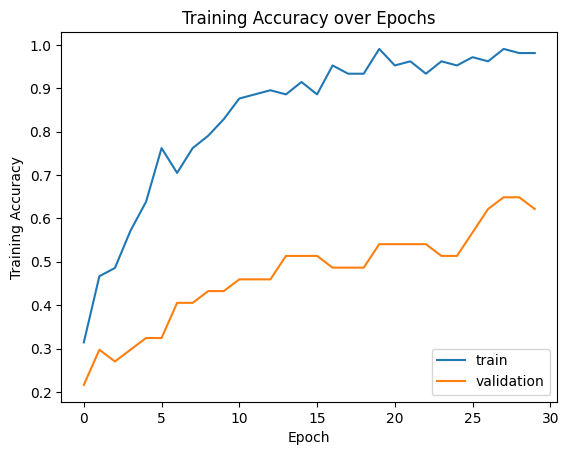

In [13]:
history = vgg_history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

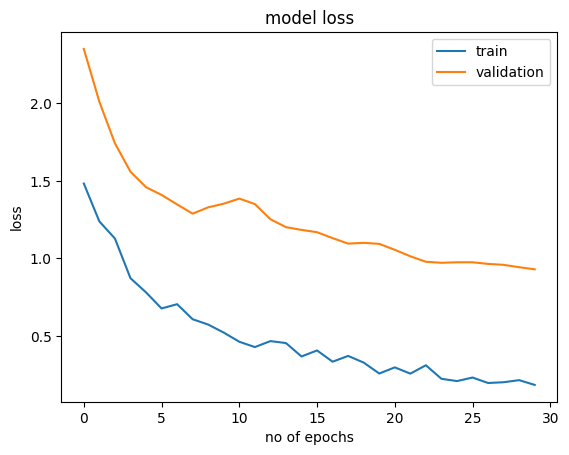

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

here we train the VGG16 model with the augumented data.

In [18]:
vgg_aug_history = vgg_model.fit(train_aug_generator, steps_per_epoch=len(train_generator),
                            epochs=30, validation_data=test_aug_generator, validation_steps=len(test_generator))

Epoch 1/30
4/4 [==============================] - 8s 2s/step - loss: 0.8367 - accuracy: 0.6000 - val_loss: 0.8451 - val_accuracy: 0.5946
Epoch 2/30
4/4 [==============================] - 5s 2s/step - loss: 0.8470 - accuracy: 0.6952 - val_loss: 0.8378 - val_accuracy: 0.6216
Epoch 3/30
4/4 [==============================] - 4s 969ms/step - loss: 0.6950 - accuracy: 0.7048 - val_loss: 0.8226 - val_accuracy: 0.6757
Epoch 4/30
4/4 [==============================] - 4s 990ms/step - loss: 0.6964 - accuracy: 0.7619 - val_loss: 0.8000 - val_accuracy: 0.6757
Epoch 5/30
4/4 [==============================] - 5s 2s/step - loss: 0.6425 - accuracy: 0.7810 - val_loss: 0.7205 - val_accuracy: 0.7027
Epoch 6/30
4/4 [==============================] - 4s 967ms/step - loss: 0.5636 - accuracy: 0.7905 - val_loss: 0.7203 - val_accuracy: 0.7027
Epoch 7/30
4/4 [==============================] - 4s 909ms/step - loss: 0.5761 - accuracy: 0.7524 - val_loss: 0.7277 - val_accuracy: 0.6757
Epoch 8/30
4/4 [=============

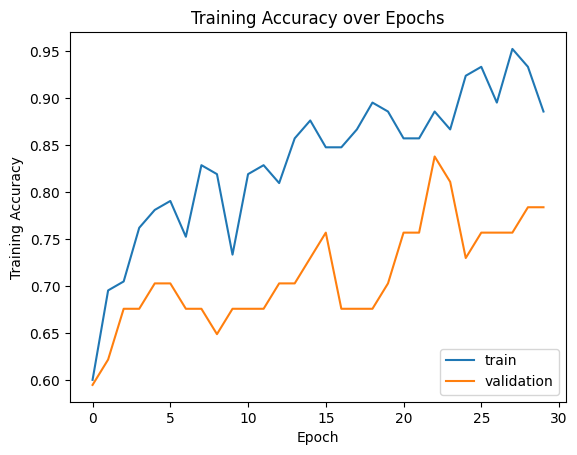

In [19]:
history = vgg_aug_history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

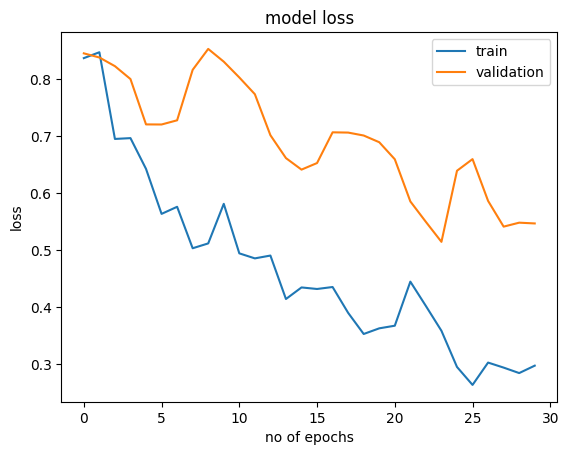

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

in this phase we will do the tasks for Resnet50. first we define the model for resnet50.

In [21]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

resnet_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


here we train the model on data without augmentation.

In [22]:
resnet_history = resnet_model.fit(train_generator, steps_per_epoch=len(train_generator),
                                  epochs=30, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/30
4/4 [==============================] - 46s 3s/step - loss: 1.6784 - accuracy: 0.3333 - val_loss: 1.1910 - val_accuracy: 0.1622
Epoch 2/30
4/4 [==============================] - 3s 681ms/step - loss: 1.3448 - accuracy: 0.3905 - val_loss: 1.1818 - val_accuracy: 0.1622
Epoch 3/30
4/4 [==============================] - 4s 900ms/step - loss: 1.1184 - accuracy: 0.4762 - val_loss: 1.1750 - val_accuracy: 0.2432
Epoch 4/30
4/4 [==============================] - 3s 701ms/step - loss: 0.8443 - accuracy: 0.6095 - val_loss: 1.1661 - val_accuracy: 0.2973
Epoch 5/30
4/4 [==============================] - 3s 918ms/step - loss: 0.6954 - accuracy: 0.7143 - val_loss: 1.1528 - val_accuracy: 0.3243
Epoch 6/30
4/4 [==============================] - 3s 693ms/step - loss: 0.5221 - accuracy: 0.8095 - val_loss: 1.1375 - val_accuracy: 0.3514
Epoch 7/30
4/4 [==============================] - 3s 691ms/step - loss: 0.5500 - accuracy: 0.7524 - val_loss: 1.1253 - val_accuracy: 0.3784
Epoch 8/30
4/4 [======

here we plot the results.

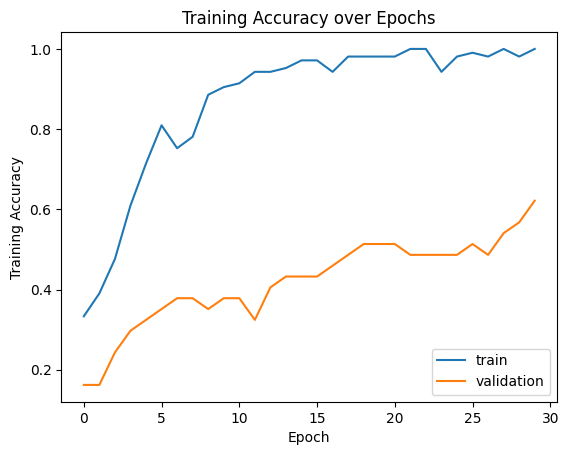

In [23]:
history = resnet_history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

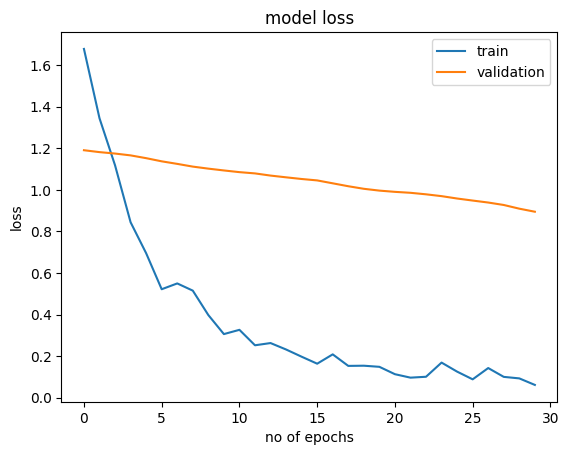

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

here we train the model on data with augmentation.

In [25]:
resnet_aug_history = resnet_model.fit(train_aug_generator, steps_per_epoch=len(train_generator),
                                  epochs=30, validation_data=test_aug_generator, validation_steps=len(test_generator))

Epoch 1/30
4/4 [==============================] - 5s 1s/step - loss: 0.8004 - accuracy: 0.6762 - val_loss: 0.8830 - val_accuracy: 0.5946
Epoch 2/30
4/4 [==============================] - 4s 1s/step - loss: 0.6875 - accuracy: 0.6952 - val_loss: 0.8630 - val_accuracy: 0.6216
Epoch 3/30
4/4 [==============================] - 4s 1s/step - loss: 0.6962 - accuracy: 0.7048 - val_loss: 0.8420 - val_accuracy: 0.6216
Epoch 4/30
4/4 [==============================] - 4s 956ms/step - loss: 0.6745 - accuracy: 0.7143 - val_loss: 0.8228 - val_accuracy: 0.6216
Epoch 5/30
4/4 [==============================] - 4s 951ms/step - loss: 0.6098 - accuracy: 0.7524 - val_loss: 0.8057 - val_accuracy: 0.6216
Epoch 6/30
4/4 [==============================] - 5s 1s/step - loss: 0.7053 - accuracy: 0.6762 - val_loss: 0.7898 - val_accuracy: 0.6216
Epoch 7/30
4/4 [==============================] - 4s 914ms/step - loss: 0.5925 - accuracy: 0.7714 - val_loss: 0.7773 - val_accuracy: 0.6486
Epoch 8/30
4/4 [================

here we plot the results.

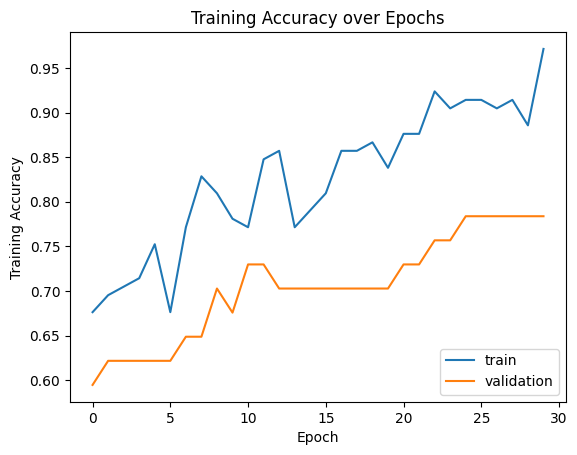

In [26]:
history = resnet_aug_history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

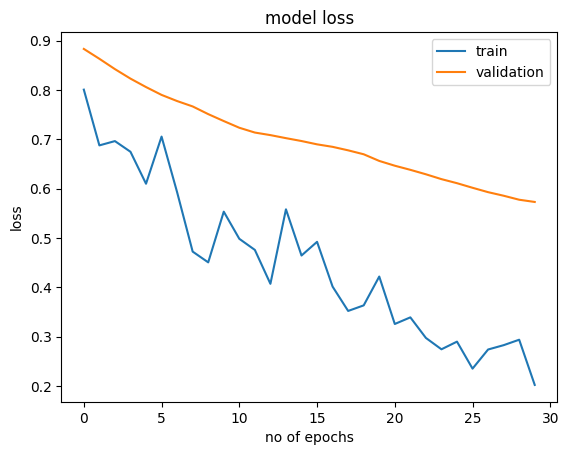

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

in this section we first predict the test data using both VGG16 and Resnet50 trained on the augumented data. then we exctract each predection's highest probability class and set as our predections. after that, we extract the true classes and each class labels using test generator. lastely we print the classification report.

In [28]:
vgg_predictions = vgg_model.predict(test_generator)
resnet_predictions = resnet_model.predict(test_generator)

vgg_predicted_classes = np.argmax(vgg_predictions, axis=1)
resnet_predicted_classes = np.argmax(resnet_predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report for VGG16
print("Classification Report for VGG16:")
print(classification_report(true_classes, vgg_predicted_classes, target_names=class_labels))

# Classification report for ResNet50
print("\nClassification Report for ResNet50:")
print(classification_report(true_classes, resnet_predicted_classes, target_names=class_labels))

2/2 [==============================] - 2s 139ms/step
Classification Report for VGG16:
              precision    recall  f1-score   support

   Carcinoma       0.36      0.38      0.37        13
    Melanoma       0.00      0.00      0.00        11
       Nevus       0.14      0.15      0.15        13

    accuracy                           0.19        37
   macro avg       0.17      0.18      0.17        37
weighted avg       0.18      0.19      0.18        37


Classification Report for ResNet50:
              precision    recall  f1-score   support

   Carcinoma       0.29      0.31      0.30        13
    Melanoma       0.43      0.27      0.33        11
       Nevus       0.31      0.38      0.34        13

    accuracy                           0.32        37
   macro avg       0.34      0.32      0.32        37
weighted avg       0.34      0.32      0.32        37



##part C##

Here are the advantages and disadvantages of data augmentation:

**Advantages:**

1. **Increased Dataset Size**: Data augmentation helps in generating additional training examples from existing data, effectively increasing the size of the dataset. A larger dataset helps prevent overfitting and allows the model to generalize better to unseen data.

2. **Improved Model Robustness**: By applying random transformations such as rotation, scaling, shearing, flipping, etc., data augmentation helps in making the model robust to variations in the input data. The model learns to recognize objects regardless of their orientation, position, or scale.

3. **Reduced Overfitting**: Augmenting the data with various transformations helps in introducing noise and variability into the training process. This regularization effect helps prevent the model from memorizing the training data and encourages it to learn more generalized features.

4. **Better Generalization**: Data augmentation helps the model to learn invariant features, i.e., features that are relevant to the object's identity regardless of its appearance. This leads to better generalization performance on unseen data, improving the model's overall accuracy.

5. **Saves Time and Cost**: Generating augmented data is computationally inexpensive compared to collecting and labeling new data. It saves time and cost associated with data collection and annotation.

**Disadvantages:**

1. **Increased Training Time**: Augmenting the data with various transformations increases the training time because the model has to process a larger number of training examples. The computational overhead can be significant, especially for complex transformations or large datasets.

2. **Potential Information Loss**: Some transformations may distort or lose important information in the images. For example, aggressive cropping or rotation may remove crucial features from the images, leading to degraded performance.

3. **Need for Domain Knowledge**: Choosing appropriate augmentation techniques and parameters requires domain knowledge and experimentation. It may not be straightforward to determine which transformations are suitable for a particular dataset or task.

4. **Increased Storage Requirements**: Storing augmented data requires additional storage space. If a large number of augmentation techniques are used, the storage requirements can become significant.

References:

(1) Exploring ResNet50: An In-Depth Look at the Model Architecture and Code Implementation: https://medium.com/@nitishkundu1993/exploring-resnet50-an-in-depth-look-at-the-model-architecture-and-code-implementation-d8d8fa67e46f

(2) Everything you need to know about VGG16: https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

(3) A Complete Guide to Data Augmentation: https://www.datacamp.com/tutorial/complete-guide-data-augmentation

(4) Data Augmentation: Benefits and Disadvantages: https://medium.com/@pouyahallaj/data-augmentation-benefits-and-disadvantages-38d8201aead


<hr>

#Question 2#

##part A##

in this part we will train a GAN on the CIFAR-10 dataset to generate realistic images similar to the original dataset. The generator learns to generate images that are close to real images, while the discriminator learns to distinguish between real and fake images.

first we have to import the necessary libraries. (they have been explained before)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras.optimizers import Adam
from keras.models import Sequential

now we must make a function to load the CIFAR-10 dataset from keras. we do not need labels and test data here, so we just skip them. after loading the images, we normalize their pixel values in a range between -1 and 1. the range [-1,1] is chosen because of the activation function we use for generator (tanh). it's better that our data be normalized symmetric and around zero for this activation function (as tanh values range between [-1,1]).

In [ ]:
def load_real_samples():
  (train_images,_), (_,_) = tf.keras.datasets.cifar10.load_data()
  train_images = train_images.astype('float32')
  train_images = (train_images - 127.5) / 127.5  # Normalize images to [-1, 1]
  return train_images

here we build the discriminator function. here we start with a 32 x 32 x 3 input, having a convolutional layer with 64 channel filter and size of 3 x 3, then 128 channles and then 256 channles and we use LeakyRelu between each convolutional layer. in the last layer, we flatten our data (so we can feed it to the dense layer), we add a dropout and then using one neuron and sigmoid function, we decide wather the image is fake or not.

In [ ]:
def build_discriminator(in_shape=(32,32,3)):
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(1, activation='sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

now it's time to define our generator function. first we have a fully connected layer which takes the input, the input shape will be the shape of our noise vector, and the size of our dense layer is such that after rashaping we would have a feature map with shape of (4,4,256). we are using LeakyRelu as it has fixed dying Relu problem. after that, we upsample our feature map using Conv2DTranspose function, which in first step will have 128 channels and 8 x 8 images, then it will preforme two more times to change the shape to 16 x 16 and 32 x 32 and at the last step we will have a conv layer with 3 channles (RGB) with the size of 32 x 32, each of them using 4 x 4 filters (conv would have 3x3) with strides of 2. as i mentioned before activation function of the last layer is tanh.

In [ ]:
def build_generator(latent_dim):
    model = models.Sequential()

    n_nodes = 256 * 4 * 4
    model.add(layers.Dense(n_nodes, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Reshape((4, 4, 256)))

    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(3, (3,3), activation='tanh', padding='same'))
    return model

here we make a function to build our gan. first we make weights in the discriminator not trainable. then we simply connect and compile the generator and discriminator with lr of 0.0002 and beta of 0.5 which are extracted by practice, then we compile and return the model.

In [ ]:
def build_gan(g_model, d_model):

    d_model.trainable = False

    model = Sequential()
    model.add(g_model)
    model.add(d_model)

    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

before we continue we define a function to generate latent vector. this will come handy later.

In [ ]:
def generate_latent_points(latent_dim, n_samples):
 x_input = np.random.randn(latent_dim * n_samples)
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input

here we define a function to generate n fake samples with class of "0" using a random latent vector with a given latent dim, and a function to pick some real images for us with label of one. they would be useful later:.

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
 x_input = generate_latent_points(latent_dim, n_samples)
 X = g_model.predict(x_input)
 y = np.zeros((n_samples, 1))
 return X, y

def generate_real_samples(dataset, n_samples):
 ix = np.random.randint(0, dataset.shape[0], n_samples)
 X = dataset[ix]
 y = np.ones((n_samples, 1))
 return X, y

here we define a function to save a plot of generated images. here we take the list of picturs, epoch number and n and draw and image in each, them we save the plot.

In [ ]:
def save_plot(examples, epoch, n=7):

 examples = (examples + 1) / 2.0 #rescaling to [0,1]

 for i in range(n * n):
  plt.subplot(n, n, 1 + i)
  plt.axis('off')
  plt.imshow(examples[i])


 filename = f'generated_plot_e{epoch+1}.png'
 plt.savefig(filename)
 plt.close()

now we must introduce a function to summerize our model. here we first prepare real samples, then evaluate our dicriminator model (d_model) with them, then we do this process for fake images and then we print the accuracies and save a plots of images and we also save the model.

In [ ]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):

 X_real, y_real = generate_real_samples(dataset, n_samples)
 x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)

 _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
 _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

 print(f'>Accuracy real: {acc_real} , fake: {acc_fake}' )

 save_plot(x_fake, epoch)
 filename = f'generator_model_{epoch+1}.h5'
 g_model.save(filename)

  in this step we define a function to do the training for us. most of the functions were already built, we must have to define some constants and put the functions together, such that the discriminator trains on fake and real images and then the generator updates the parameters using the updated discriminator. after that we just print the results and each 10 epoches we save s summary.

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=128):
 bat_per_epo = int(dataset.shape[0] / n_batch)
 half_batch = int(n_batch / 2)

 for i in range(n_epochs):
  for j in range(bat_per_epo):

    X_real, y_real = generate_real_samples(dataset, half_batch)
    d_loss1, _ = d_model.train_on_batch(X_real, y_real)

    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)

    X_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = np.ones((n_batch, 1))

    g_loss = gan_model.train_on_batch(X_gan, y_gan)

    print(f'>n_ep: {i+1}, {j+1}/{bat_per_epo}, d1={d_loss1}, d2={d_loss1} g={g_loss}')

 # evaluate the model performance, sometimes
  if (i+1) % 10 == 0:
    summarize_performance(i, g_model, d_model, dataset, latent_dim)

now that all the functions are ready, we jusy run them and see the results!

In [ ]:
latent_dim = 100

d_model = build_discriminator()
g_model = build_generator(latent_dim)
gan_model = build_gan(g_model, d_model)

dataset = load_real_samples()
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
>n_ep: 4, 232/390, d1=0.5189540386199951, d2=0.5189540386199951 g=1.3998794555664062
2/2 [==============================] - 0s 5ms/step
>n_ep: 4, 233/390, d1=0.4890081286430359, d2=0.4890081286430359 g=1.449972152709961
2/2 [==============================] - 0s 6ms/step
>n_ep: 4, 234/390, d1=0.5239325165748596, d2=0.5239325165748596 g=1.4722166061401367
2/2 [==============================] - 0s 6ms/step
>n_ep: 4, 235/390, d1=0.5107196569442749, d2=0.5107196569442749 g=1.3915669918060303
2/2 [==============================] - 0s 6ms/step
>n_ep: 4, 236/390, d1=0.4963511824607849, d2=0.4963511824607849 g=1.4950711727142334
2/2 [==============================] - 0s 6ms/step
>n_ep: 4, 237/390, d1=0.5713201761245728, d2=0.5713201761245728 g=1.4702372550964355
2/2 [==============================] - 0s 5ms/step
>n_ep: 4, 238/390, d1=0.7252511978149414, d2=0.7252511978149414 g=1.39375901222229


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
>n_ep: 14, 232/390, d1=0.6241347789764404, d2=0.6241347789764404 g=0.8791508078575134
2/2 [==============================] - 0s 5ms/step
>n_ep: 14, 233/390, d1=0.6335179805755615, d2=0.6335179805755615 g=0.8976713418960571
2/2 [==============================] - 0s 7ms/step
>n_ep: 14, 234/390, d1=0.5942341685295105, d2=0.5942341685295105 g=0.9219423532485962
2/2 [==============================] - 0s 5ms/step
>n_ep: 14, 235/390, d1=0.6440986394882202, d2=0.6440986394882202 g=0.8923208117485046
2/2 [==============================] - 0s 6ms/step
>n_ep: 14, 236/390, d1=0.6154924631118774, d2=0.6154924631118774 g=0.9055982828140259
2/2 [==============================] - 0s 6ms/step
>n_ep: 14, 237/390, d1=0.7018435001373291, d2=0.7018435001373291 g=0.9272369742393494
2/2 [==============================] - 0s 5ms/step
>n_ep: 14, 238/390, d1=0.6420006155967712, d2=0.6420006155967712 g=0.8947156

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>n_ep: 24, 232/390, d1=0.6461130380630493, d2=0.6461130380630493 g=0.8480886220932007
2/2 [==============================] - 0s 5ms/step
>n_ep: 24, 233/390, d1=0.7042633295059204, d2=0.7042633295059204 g=0.8639655113220215
2/2 [==============================] - 0s 6ms/step
>n_ep: 24, 234/390, d1=0.683684229850769, d2=0.683684229850769 g=0.896651566028595
2/2 [==============================] - 0s 5ms/step
>n_ep: 24, 235/390, d1=0.7407069206237793, d2=0.7407069206237793 g=0.8813116550445557
2/2 [==============================] - 0s 6ms/step
>n_ep: 24, 236/390, d1=0.7181015014648438, d2=0.7181015014648438 g=0.9034605026245117
2/2 [==============================] - 0s 6ms/step
>n_ep: 24, 237/390, d1=0.7187020182609558, d2=0.7187020182609558 g=0.8420535922050476
2/2 [==============================] - 0s 7ms/step
>n_ep: 24, 238/390, d1=0.7362005710601807, d2=0.7362005710601807 g=0.8392142057

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
>n_ep: 34, 232/390, d1=0.6721149682998657, d2=0.6721149682998657 g=0.8164520859718323
2/2 [==============================] - 0s 6ms/step
>n_ep: 34, 233/390, d1=0.6532539129257202, d2=0.6532539129257202 g=0.8204134106636047
2/2 [==============================] - 0s 7ms/step
>n_ep: 34, 234/390, d1=0.6640112400054932, d2=0.6640112400054932 g=0.8150463104248047
2/2 [==============================] - 0s 4ms/step
>n_ep: 34, 235/390, d1=0.666316032409668, d2=0.666316032409668 g=0.7859885692596436
2/2 [==============================] - 0s 4ms/step
>n_ep: 34, 236/390, d1=0.702817440032959, d2=0.702817440032959 g=0.7916039228439331
2/2 [==============================] - 0s 7ms/step
>n_ep: 34, 237/390, d1=0.6273553967475891, d2=0.6273553967475891 g=0.7850666046142578
2/2 [==============================] - 0s 8ms/step
>n_ep: 34, 238/390, d1=0.645732045173645, d2=0.645732045173645 g=0.7875753641128

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>n_ep: 44, 232/390, d1=0.5925784111022949, d2=0.5925784111022949 g=0.8762295246124268
2/2 [==============================] - 0s 4ms/step
>n_ep: 44, 233/390, d1=0.6471794843673706, d2=0.6471794843673706 g=0.8473520874977112
2/2 [==============================] - 0s 9ms/step
>n_ep: 44, 234/390, d1=0.6659133434295654, d2=0.6659133434295654 g=0.8308129906654358
2/2 [==============================] - 0s 5ms/step
>n_ep: 44, 235/390, d1=0.6630929708480835, d2=0.6630929708480835 g=0.8233463764190674
2/2 [==============================] - 0s 4ms/step
>n_ep: 44, 236/390, d1=0.6500527858734131, d2=0.6500527858734131 g=0.8189833760261536
2/2 [==============================] - 0s 5ms/step
>n_ep: 44, 237/390, d1=0.7311059236526489, d2=0.7311059236526489 g=0.855408787727356
2/2 [==============================] - 0s 5ms/step
>n_ep: 44, 238/390, d1=0.6567590832710266, d2=0.6567590832710266 g=0.86164551

i downloaded the saved pictures and i will show them here:

this is the result of the first 10 epoches:

Downloading...
From: https://drive.google.com/uc?id=1k71W7rtlOu3PCHbKNqEq27c_eJ5qOEt5
To: /content/epoch_10.png
100% 230k/230k [00:00<00:00, 5.74MB/s]


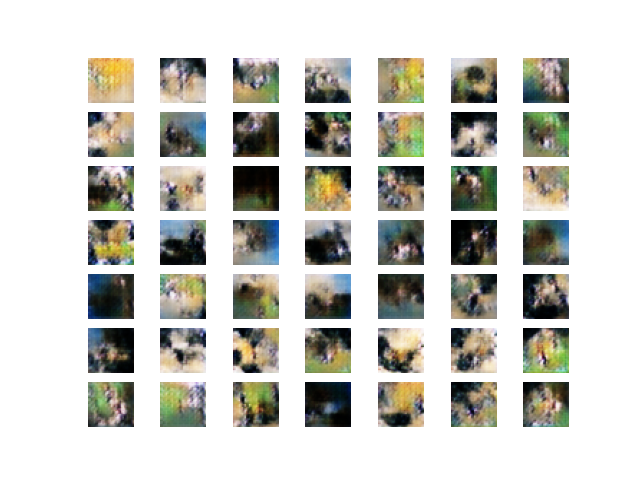

In [ ]:
from IPython.display import Image
!gdown 1k71W7rtlOu3PCHbKNqEq27c_eJ5qOEt5
Image("/content/epoch_10.png")

Downloading...
From: https://drive.google.com/uc?id=1ke8c5susBHnnVLxNiiUvaQfI6I52VUb4
To: /content/epoch_20.png
100% 231k/231k [00:00<00:00, 5.01MB/s]


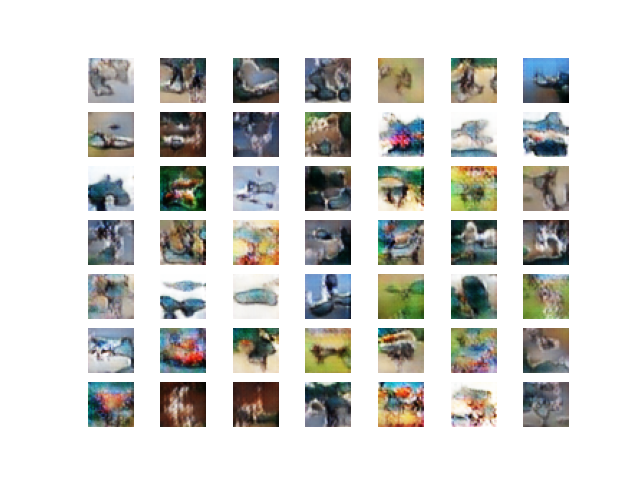

In [ ]:
!gdown 1ke8c5susBHnnVLxNiiUvaQfI6I52VUb4
Image("/content/epoch_20.png")

Downloading...
From: https://drive.google.com/uc?id=1kY2jMCAYD6FHjTkaW5G3QgCeuwQHHhZH
To: /content/epoch_30.png
100% 225k/225k [00:00<00:00, 4.96MB/s]


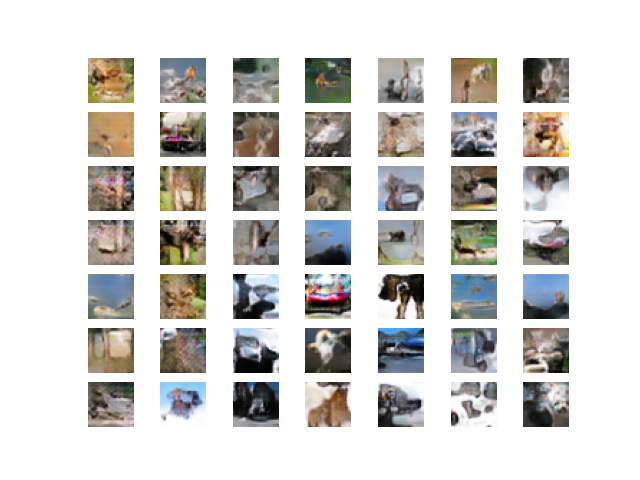

In [ ]:
!gdown 1kY2jMCAYD6FHjTkaW5G3QgCeuwQHHhZH
Image("/content/epoch_30.png")

Downloading...
From: https://drive.google.com/uc?id=1FkueZOEnPnNJt4aUco4hdO3xTOcjjSA5
To: /content/epoch_40.png
100% 227k/227k [00:00<00:00, 5.01MB/s]


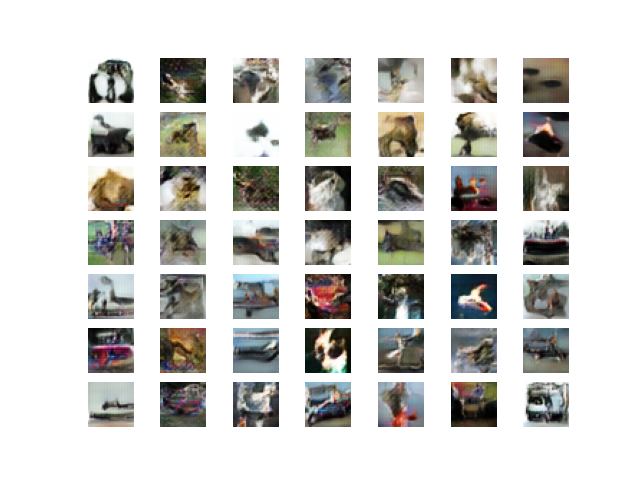

In [ ]:
!gdown 1FkueZOEnPnNJt4aUco4hdO3xTOcjjSA5
Image("/content/epoch_40.png")

Downloading...
From: https://drive.google.com/uc?id=1DdpjdPDL1FtmXn12sszuyPemvuNWJwn4
To: /content/epoch_50.png
100% 227k/227k [00:00<00:00, 5.80MB/s]


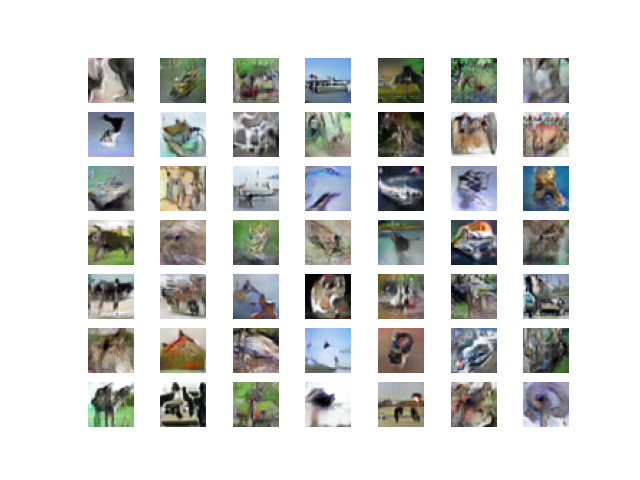

In [ ]:
!gdown 1DdpjdPDL1FtmXn12sszuyPemvuNWJwn4
Image("/content/epoch_50.png")


##part B##

now it's time to talk about the gradient ascent and the gradeint descent! the the major difference between these two is:

gradient descent: in gradient descent we intend to minimize the likelihood of the discriminator being correct.

gradient ascent: in this method we would achive our goal with another objective function. we will maximize the probability of the discriminator being wrong.

they may look the same on the outside, but there is a major difference between them in practice. see the picture below:

Downloading...
From: https://drive.google.com/uc?id=1TGeFWVbb42i5Y9oKhnB5dGAahcxId20_
To: /content/descending.jpg
100% 18.2k/18.2k [00:00<00:00, 25.4MB/s]


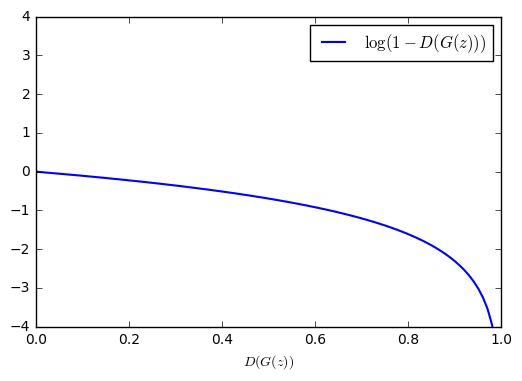

In [ ]:
!gdown 1TGeFWVbb42i5Y9oKhnB5dGAahcxId20_
Image("/content/descending.jpg")

as you can see in the descending methods curve, in the begining where the discriminator wants to learn from the fake samples and train the generator, the gradient is almost 0, and when the sample is getting close to real data the gradient will shoot down, which is bad.

now see the below image:

Downloading...
From: https://drive.google.com/uc?id=1eyjUz8oO9FvQbJPBu7VcG-KxFCyS3g2Y
To: /content/ascending.jpg
100% 21.7k/21.7k [00:00<00:00, 40.9MB/s]


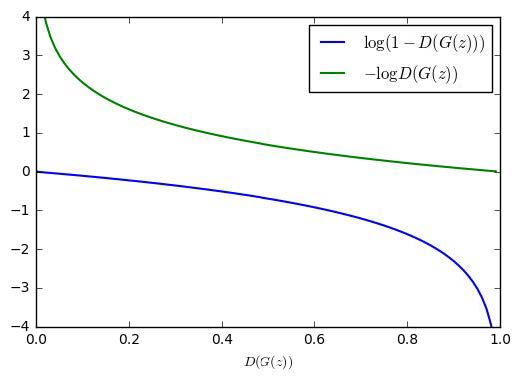

In [ ]:
!gdown 1eyjUz8oO9FvQbJPBu7VcG-KxFCyS3g2Y
Image("/content/ascending.jpg")

now the ascending process (green curve) as you can see solved this problem. when the samples are not that good, the gradient has big values. then as much as we get better in creating images closer to real, the gradient will get closer to 0 and the process will converge very good.

References:
(1) How to Develop a GAN to Generate CIFAR10 Small Color Photographs: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/

<hr>

#Question 3#


##part A##

when performing transfer learning, the similarity or dissimilarity between the new data and the pre-trained dataset has a great impact on goodness of the transfer.

1. **similar data to pre-trained dataset**:
   - **advantages**:
     
     when the new data is similar to the pre-trained dataset, transfer learning tends to work very well.
      features learned by the pre-trained model are likely to be relevant to the new data, and therefore by changing the top module we are likely to get great results.
   - **example**:

      for example if your pre trained model is trained on imagenet, a dataset of cars or flowers will be learned better by the model.

2. **dissimilar data from pre-trained dataset**:
   - **challenges**:

      when the new data is very different from the pre-trained dataset, transfer learning can face several challenges. features learned by the pre-trained model may not be relevant to the new data, leading to poor performance. therefore it might require fine-tuning on many layers or adding or deleting some layers or in worst-case scenario, training the model from scratch so the model might fit this set of data better.
   - **example**:

     suppose you have a pre-trained model on ImageNet, but you want to classify medical images like x-rays.


here we provide codes for the similar dataset:

first we import the required modules. we use ResNet50 as our pretrained model, along with the dataset of Flowers inside of tensorflow_datasets as our classification data. we also import the necessary components of building a model (layers, optimizers and ...).

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout

in this step we import the Flowers dataset. we split it into training and validation set such that our training dataset will be 70 and the test dataset will be 30 percents of the whole data. also the parameter "as_supervised" tells tfds to label the data.

In [ ]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1.incompletePX0IT0',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

as you can see in the description this is a relatively small data set with 3670 samples and 5 classes.

here we take a small peek in dataset pictures sizes. as you can see we don't have equal sizes so we must do a resize operation on our dataset.

In [ ]:
for i, example in enumerate(training_set.take(5)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


here we find our the number of our training samples:

In [ ]:
num_training_examples = 0
for _  in training_set:
  num_training_examples += 1
print(num_training_examples)

2569


now that we know the number of our training examples, we must define and use our image formatting function. inside of our fuction we first resize the images and then using ResNet50 built in function, we make it able to be fed to the model.we then apply this function to our dataset using .map, and after that we split our data into batches with size of 32.

In [ ]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label
train_dataset = training_set.shuffle(num_training_examples).map(format_image).batch(32)
test_dataset = validation_set.map(format_image).batch(32)

in this part we load the ResNet50 model, which was pre trained on imagenet and doesn't have the top fully connected layer. also we define it's input shape to be 224 by 224 by 3. we also freez the layers of the pre trained model.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


here we add custom top layers. here we will use a global average pooling to prepare the data to be fed to the fully connected layers. then we have two dense layers and batch normalization with dropout between them. lastely we have a softmax layer that classifies 5 classes. after that, we define our model with input of the ResNet50 model and the output of our softmax layer.

In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = layers.Dense(5, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

here we compile and train our model for 10 epoches.

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',  # Since our labels are integers
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
81/81 [==============================] - 18s 162ms/step - loss: 1.1363 - accuracy: 0.5722 - val_loss: 0.4553 - val_accuracy: 0.8547
Epoch 2/10
81/81 [==============================] - 12s 153ms/step - loss: 0.6638 - accuracy: 0.7727 - val_loss: 0.3615 - val_accuracy: 0.8874
Epoch 3/10
81/81 [==============================] - 12s 150ms/step - loss: 0.5190 - accuracy: 0.8315 - val_loss: 0.3225 - val_accuracy: 0.8946
Epoch 4/10
81/81 [==============================] - 12s 149ms/step - loss: 0.4280 - accuracy: 0.8614 - val_loss: 0.2825 - val_accuracy: 0.9083
Epoch 5/10
81/81 [==============================] - 12s 148ms/step - loss: 0.3988 - accuracy: 0.8684 - val_loss: 0.2795 - val_accuracy: 0.9164
Epoch 6/10
81/81 [==============================] - 12s 145ms/step - loss: 0.3294 - accuracy: 0.8926 - val_loss: 0.2610 - val_accuracy: 0.9173
Epoch 7/10
81/81 [==============================] - 12s 144ms/step - loss: 0.2948 - accuracy: 0.9050 - val_loss: 0.2716 - val_accuracy: 0.9110

here we plot the results.

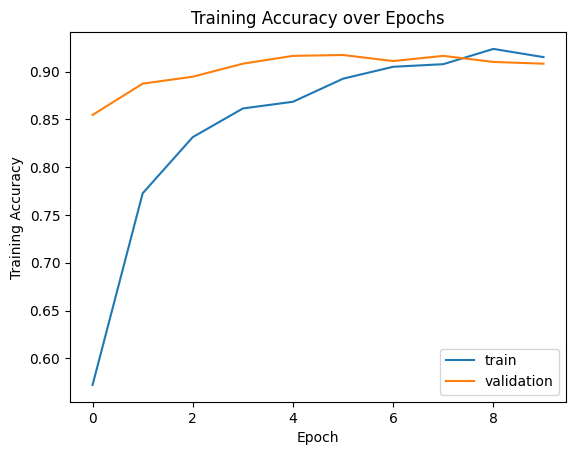

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

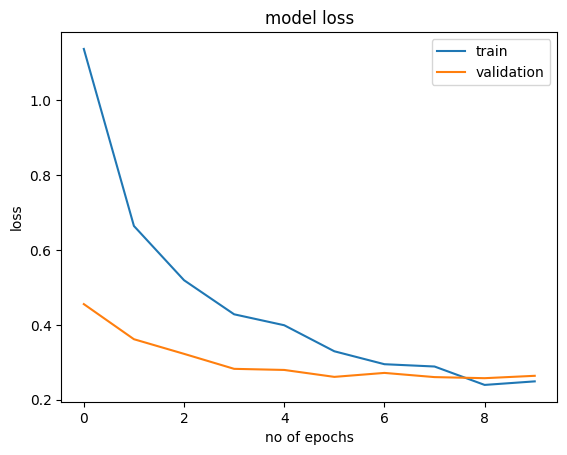

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

References:

(1) Flowers with Transfer Learning (MobileNet-Keras): https://www.kaggle.com/code/leifuer/flowers-with-transfer-learning-mobilenet-keras#TODO:-Print-Information-about-the-Flowers-Dataset

(2) Transfer learning and fine-tuning: https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.tensorflow.org/tutorials/images/transfer_learning&ved=2ahUKEwiKxL2nmf6FAxVnYUEAHWFiCR4QFnoECDMQAQ&usg=AOvVaw1ip257CKO5ulgGyiHOM4yV

##part B##

In [ ]:
import os

if os.path.exists(os.path.join(os.getcwd(), '/content/COVID19-Data.zip')):
  pass
else:
  !gdown 1PpqhwXJBGm1UAek6WSpjgO2zm-Va_czu
  !unzip /content/COVID19-Data.zip
  !mkdir COVID19
  !mv Chest_COVID/ Chest_NonCOVID/ COVID19

first we import the required modules. we use ResNet50 as our pretrained model, along with the dataset of Flowers inside of tensorflow_datasets as our classification data. we also import the necessary components of building a model (layers, optimizers and ...).

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout

in this step we import the Flowers dataset. we split it into training and validation set such that our training dataset will be 70 and the test dataset will be 30 percents of the whole data. also the parameter "as_supervised" tells tfds to label the data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

covid_folder = "/content/COVID19"

covid_dataset = image_dataset_from_directory(
    covid_folder,
    batch_size=None,
    shuffle=True,
    )

validation_batches = tf.data.experimental.cardinality(covid_dataset)
validation_set = covid_dataset.take(validation_batches // 5)
training_set = covid_dataset.skip(validation_batches // 5)

print('Number of train batches: %d' % tf.data.experimental.cardinality(training_set))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_set))

Found 940 files belonging to 2 classes.
Number of train batches: 752
Number of validation batches: 188


here we take a small peek in dataset pictures sizes. as you can see we don't have equal sizes so we must do a resize operation on our dataset.

In [ ]:
for i, example in enumerate(training_set.take(5)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (256, 256, 3) label: 1
Image 2 shape: (256, 256, 3) label: 0
Image 3 shape: (256, 256, 3) label: 1
Image 4 shape: (256, 256, 3) label: 1
Image 5 shape: (256, 256, 3) label: 1


here we find our the number of our training samples:

In [ ]:
num_training_examples = 0
for _  in training_set:
  num_training_examples += 1
print(num_training_examples)

752


now that we know the number of our training examples, we must define and use our image formatting function. inside of our fuction we first resize the images and then using ResNet50 built in function, we make it able to be fed to the model.we then apply this function to our dataset using .map, and after that we split our data into batches with size of 32.

In [ ]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label
train_dataset = training_set.shuffle(num_training_examples).map(format_image).batch(32)
test_dataset = validation_set.map(format_image).batch(32)

in this part we load the ResNet50 model, which was pre trained on imagenet and doesn't have the top fully connected layer. also we define it's input shape to be 224 by 224 by 3. we also freez the layers of the pre trained model.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# random_layers = np.random.randint(0,50,40)
# for layer in random_layers:
#     base_model.layers[layer].trainable = False

for layer in base_model.layers[:-5]:
    layer.trainable = False

here we add custom top layers. here we will use a global average pooling to prepare the data to be fed to the fully connected layers. then we have two dense layers and batch normalization with dropout between them. lastely we have a softmax layer that classifies 5 classes. after that, we define our model with input of the ResNet50 model and the output of our softmax layer.

In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = layers.Dense(5, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

here we compile and train our model for 10 epoches.

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',  # Since our labels are integers
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
24/24 [==============================] - 26s 589ms/step - loss: 1.4540 - accuracy: 0.4588 - val_loss: 1.2729 - val_accuracy: 0.5904
Epoch 2/10
24/24 [==============================] - 17s 434ms/step - loss: 0.8032 - accuracy: 0.7314 - val_loss: 0.6703 - val_accuracy: 0.8723
Epoch 3/10
24/24 [==============================] - 19s 568ms/step - loss: 0.5493 - accuracy: 0.8723 - val_loss: 0.4658 - val_accuracy: 0.9043
Epoch 4/10
24/24 [==============================] - 17s 437ms/step - loss: 0.3563 - accuracy: 0.9149 - val_loss: 0.2881 - val_accuracy: 0.9574
Epoch 5/10
24/24 [==============================] - 16s 420ms/step - loss: 0.2978 - accuracy: 0.9428 - val_loss: 0.1602 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 16s 402ms/step - loss: 0.2073 - accuracy: 0.9601 - val_loss: 0.1162 - val_accuracy: 0.9894
Epoch 7/10
24/24 [==============================] - 20s 546ms/step - loss: 0.1910 - accuracy: 0.9574 - val_loss: 0.0839 - val_accuracy: 0.9947

here we plot the results.

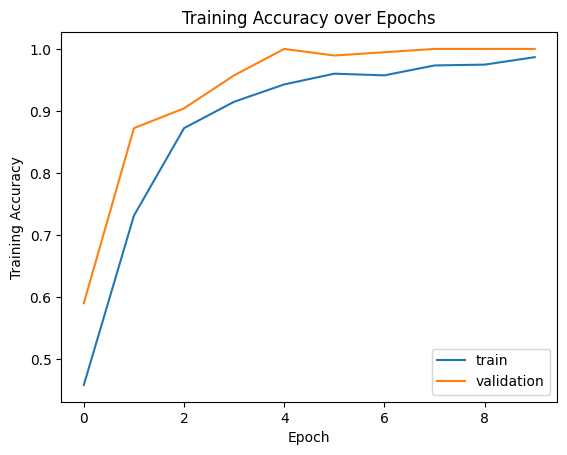

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

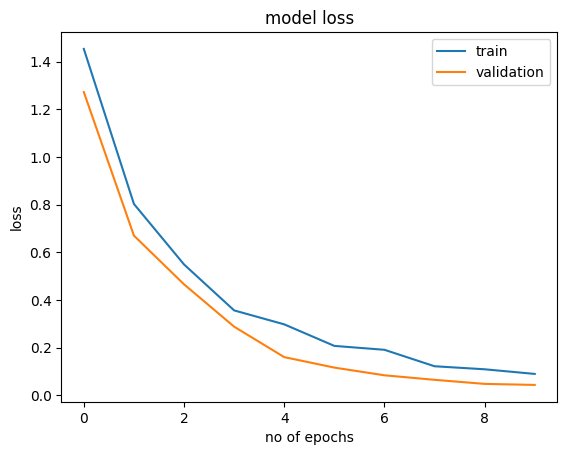

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

here we do the training without fine funing:

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = layers.Dense(5, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',  # Since our labels are integers
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
24/24 [==============================] - 25s 607ms/step - loss: 1.5540 - accuracy: 0.4335 - val_loss: 1.6621 - val_accuracy: 0.6011
Epoch 2/10
24/24 [==============================] - 20s 545ms/step - loss: 0.9537 - accuracy: 0.6742 - val_loss: 0.9293 - val_accuracy: 0.7819
Epoch 3/10
24/24 [==============================] - 16s 428ms/step - loss: 0.6716 - accuracy: 0.8098 - val_loss: 0.6363 - val_accuracy: 0.8245
Epoch 4/10
24/24 [==============================] - 17s 422ms/step - loss: 0.5116 - accuracy: 0.8670 - val_loss: 0.3998 - val_accuracy: 0.8989
Epoch 5/10
24/24 [==============================] - 19s 546ms/step - loss: 0.3563 - accuracy: 0.9189 - val_loss: 0.2711 - val_accuracy: 0.9574
Epoch 6/10
24/24 [==============================] - 16s 393ms/step - loss: 0.3206 - accuracy: 0.9322 - val_loss: 0.2069 - val_accuracy: 0.9628
Epoch 7/10
24/24 [==============================] - 20s 546ms/step - loss: 0.2781 - accuracy: 0.9375 - val_loss: 0.1625 - val_accuracy: 0.9628

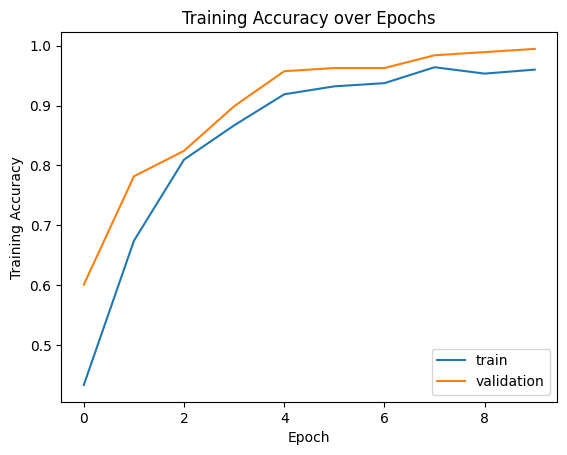

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

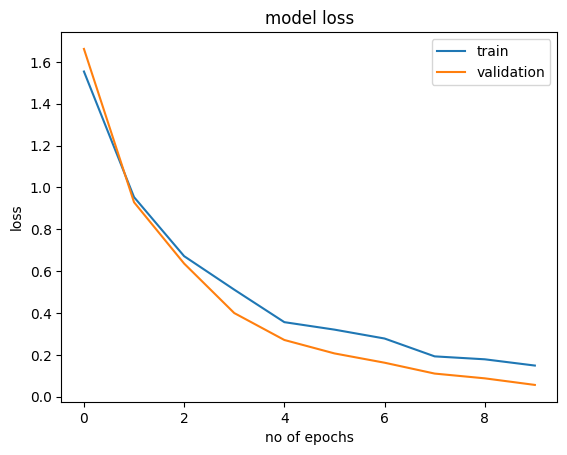

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

References:

(1) Data_set Reference: https://github.com/alfonsosantacruz/covid19-chest-xray-detector?tab=readme-ov-file